In [2]:
import numpy as np
import random
from tools import *
from qiskit import QuantumCircuit, Aer, execute

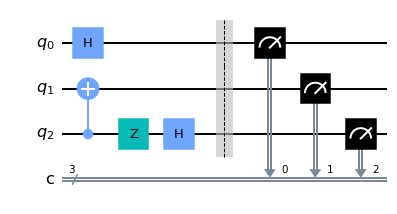

In [28]:
qc = QuantumCircuit(3,3)
for i in range(0,int(random.randint(1,5))):
    g = random.choice(("hadamard","x","y","z","cnot"))
    if g == "cnot":
        q = random.sample(tuple(range(0,3)),2)
        add_gate(qc,gate=g,channel=q[0],channel_op=q[1])
    else:
        q = random.choice(tuple(range(0,3)))
        add_gate(qc,gate=g,channel=q)
 
qc.barrier()
qc.measure([0,1,2],[0,1,2])
qc.draw('mpl')
    
    

In [30]:
simulator = Aer.get_backend('qasm_simulator')
x = measuring(qc, backend=simulator)
y = measuring(qc, backend=simulator)

In [31]:
print(x,y)

{'000': 25.5, '001': 24.85, '100': 24.75, '101': 24.9} {'000': 25.8, '001': 25.0, '100': 23.9, '101': 25.3}


In [17]:
similarity(x,y)

(True, 0.00014441092953609846)

In [37]:
a = {'000': 47.852, '001': 1.855, '010': 1.074, '011': 48.828, '100': 0.098, '111': 0.293}
b = {'000': 50.293, '001': 1.172, '010': 4.883, '011': 42.773, '100': 0.488, '111': 0.391}
c = {'000': 52.832, '001': 1.465, '010': 0.781, '011': 44.283, '100': 0.391, '111': 0.195}

In [40]:
similarity(b,c)

(True, 0.001989546117588503)